In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import pandas as pd
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Using TensorFlow backend.


In [5]:
crime_2018_cleaned = pd.read_csv('../data/processed/crime_2018_cleaned.csv', low_memory=False)
X = np.array(crime_2018_cleaned.drop('Arrest', axis = 1))
y = crime_2018_cleaned['Arrest']

In [6]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [45]:
# Step #3 - Train the Model

#For a single-input model with 2 classes (binary classification):

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=29))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'rmsprop',
              loss      = 'binary_crossentropy',
              metrics   = ['binary_accuracy'])

#  data
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2)
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(yTrain),
                                                 yTrain)
# data = X
# labels = y

# Train the model, iterating on the data in batches of 32 samples
# model.fit(data, labels, epochs=10, batch_size=32, class_weight=class_weights)
model.fit(xTrain, yTrain, epochs = 5, batch_size = 128, class_weight=class_weights)
yPred_prob = model.predict(xTest, batch_size=128)
# yPred = np.argmax(yPred_prob, axis=-1)
yPred = model.predict_classes(xTest)
y_pred_keras = model.predict(xTest).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(yTest, y_pred_keras)
# score = model.evaluate(xTest, yTest, batch_size = 128)
# print(score)

Epoch 1/5
214050/214050 [==============================] - 2s 9us/step - loss: 0.4437 - binary_accuracy: 0.8105
Epoch 2/5
214050/214050 [==============================] - 2s 8us/step - loss: 0.4096 - binary_accuracy: 0.8454
Epoch 3/5
214050/214050 [==============================] - 2s 10us/step - loss: 0.3990 - binary_accuracy: 0.8519: 0s - loss: 0.4000 - binary_accuracy: 0. - ETA: 0s - loss: 0.3993 - binary_accuracy: 0.8
Epoch 4/5
214050/214050 [==============================] - 2s 9us/step - loss: 0.3919 - binary_accuracy: 0.8552A: 0s - loss: 0.3932 - binary_accu
Epoch 5/5
214050/214050 [==============================] - 2s 8us/step - loss: 0.3841 - binary_accuracy: 0.8580


In [47]:
yPred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

In [30]:
auc_keras = auc(fpr_keras,tpr_keras)

In [31]:
auc_keras 

0.832886429738717

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import *
import matplotlib.pyplot as plt

Epoch 1/5
214050/214050 [==============================] - 2s 11us/step - loss: 0.4374 - accuracy: 0.8102
Epoch 2/5
214050/214050 [==============================] - 2s 9us/step - loss: 0.4028 - accuracy: 0.8390: 1s - loss: 0.4059 - ac - ETA: 0s -
Epoch 3/5
214050/214050 [==============================] - 2s 8us/step - loss: 0.3841 - accuracy: 0.8525
Epoch 4/5
214050/214050 [==============================] - 2s 8us/step - loss: 0.3694 - accuracy: 0.8596
Epoch 5/5
214050/214050 [==============================] - 2s 8us/step - loss: 0.3603 - accuracy: 0.8633: 0s - loss: 0.3603 - accu
Epoch 1/5
214050/214050 [==============================] - 2s 9us/step - loss: 0.4413 - accuracy: 0.8053
Epoch 2/5
214050/214050 [==============================] - 2s 9us/step - loss: 0.4041 - accuracy: 0.8386
Epoch 3/5
214050/214050 [==============================] - 2s 8us/step - loss: 0.3853 - accuracy: 0.8520
Epoch 4/5
214050/214050 [==============================] - 2s 8us/step - loss: 0.3708 - accuracy:

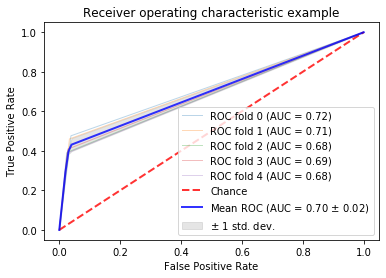

[[207793, 6377], [30697, 22696]]


Text(0.5, 1, 'Confusion Matrix')

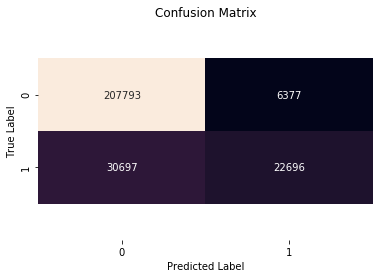

In [49]:
###### How do we use this in Cross Validation?

from scipy import interp

skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
cm = []
i=0
for trainIndex, textIndex in skf.split(X, y):
    xTrain, xTest = X[trainIndex], X[textIndex]
    yTrain, yTest = y[trainIndex], y[textIndex]
    
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=29))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer = 'rmsprop',
                  loss      = 'binary_crossentropy',
                  metrics   = ['accuracy'])

    #  data
    class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(yTrain),
                                                 yTrain)  
    # fit model
    model.fit(xTrain, yTrain, epochs = 5, batch_size = 128, class_weight=class_weights)
    
    yPred_prob = model.predict(xTest, batch_size=128)
    yPred = model.predict_classes(xTest)
    # All Scores
    acc.append(accuracy_score(yTest, yPred))
    f1.append(f1_score(yTest,yPred))
    cm.append(confusion_matrix(yTest,yPred))
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [ ]:
# How do we use this in Cross Validation?

from scipy import interp

skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
mcc = []
cm = []
i=0
for trainIndex, textIndex in skf.split(X, y):
    xTrain, xTest = X[trainIndex], X[textIndex]
    yTrain, yTest = y[trainIndex], y[textIndex]
    
    clf = MLPClassifier(solver='lbfgs', alpha=100, hidden_layer_sizes=(100,), max_iter = 300)
    clf.fit(xTrain, yTrain.values.ravel())  
    
    yPred = clf.predict(xTest)
    
    # All Scores
    acc.append(accuracy_score(yTest, yPred))
    f1.append(f1_score(yPred,yTest))
    mcc.append(matthews_corrcoef(yTest, yPred))
    cm.append(confusion_matrix(yTest,yPred))
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

Epoch 1/10
214050/214050 [==============================] - 2s 8us/step - loss: 0.4414 - binary_accuracy: 0.8171
Epoch 2/10
214050/214050 [==============================] - 1s 6us/step - loss: 0.3938 - binary_accuracy: 0.8498
Epoch 3/10
214050/214050 [==============================] - 1s 6us/step - loss: 0.3688 - binary_accuracy: 0.8609
Epoch 4/10
214050/214050 [==============================] - 1s 6us/step - loss: 0.3580 - binary_accuracy: 0.8632
Epoch 5/10
214050/214050 [==============================] - 1s 6us/step - loss: 0.3508 - binary_accuracy: 0.8655
Epoch 6/10
214050/214050 [==============================] - 1s 6us/step - loss: 0.3442 - binary_accuracy: 0.8671
Epoch 7/10
214050/214050 [==============================] - 1s 6us/step - loss: 0.3400 - binary_accuracy: 0.8686
Epoch 8/10
214050/214050 [==============================] - 1s 7us/step - loss: 0.3361 - binary_accuracy: 0.8701A: 0s - loss: 0.3371 - binary_accuracy:
Epoch 9/10
214050/214050 [==============================]

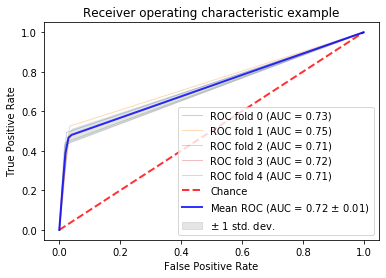

[[208952, 5218], [28183, 25210]]


Text(0.5, 1, 'Confusion Matrix')

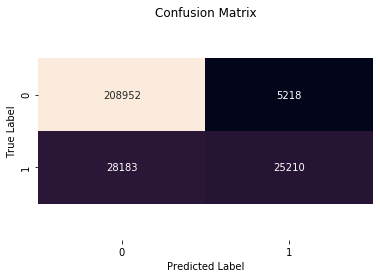

In [7]:
###### How do we use this in Cross Validation?

from scipy import interp

skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
acc = []
f1 = []
cm = []
i=0
for trainIndex, textIndex in skf.split(X, y):
    xTrain, xTest = X[trainIndex], X[textIndex]
    yTrain, yTest = y[trainIndex], y[textIndex]
    
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=29))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer = 'rmsprop',
                  loss      = 'binary_crossentropy',
                  metrics   = ['binary_accuracy'])

    #  data
    class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(yTrain),
                                                 yTrain)  
    # fit model
    model.fit(xTrain, yTrain, epochs = 10, batch_size = 256, class_weight=class_weights)
    
    yPred_prob = model.predict(xTest, batch_size=128)
    yPred = model.predict_classes(xTest)
    # All Scores
    acc.append(accuracy_score(yTest, yPred))
    f1.append(f1_score(yTest,yPred))
    cm.append(confusion_matrix(yTest,yPred))
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    
   
# # print(cm)
# print(cm[0])
tp = fp = fn = tn = 0
for m in cm:
    tp += m[0][0]
    fp += m[0][1]
    
    fn += m[1][0]
    tn += m[1][1]
    
# print(tp, fp, fn, tn)
finalCM = [[tp, fp], [fn, tn]]

print(finalCM)
ax = sns.heatmap(finalCM, annot=True, cbar=False, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')